# Exploring Stackoverflow Anual Developer Survey 2020
This is a data analysis on [Stackoverflow Anual Developer Survey](https://insights.stackoverflow.com/survey) The whole project is implemented following "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process, including the following steps:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Model Data
5. Results
6. Deploy

In [1]:
# import the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline



## 1. Business Understanding
I'm from Guatemala and I'm interested in how the latin american developers works. I would like to answear the following questions:

1. How are developers' demographics in Latin America and the Caribbean (LAC): average age, country, level of education?
2. Does it change the status of satisfaction related to the professional experience in Latin America and the Caribbean (LAC)?
3. What is the salary behavior according to years of experience, country and Developer type?
4. What skills are more valuable for the developers (love the language), and what skills generate more earning?

### Data Understanding
We will use two datasets as data sources: 
1. **df_2020:**  it is the survey result for 2020; it results from the survey. The schema definition is in the file: `data/2020/survey_results_schema.csv`. For more information about it, please check [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey)
2. **df_countries:** Latin America and the Caribbean country list


In [2]:
# Import the data
df_2020 = pd.read_csv('data/2020/survey_results_public.csv')
df_2020.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [3]:
df_countries = pd.read_csv('data/latin_america.csv')
df_countries.head()

,Country
0,Antigua and Barbuda
1,Anguilla
2,Netherlands Antilles
3,Argentina
4,Aruba


In [4]:
df_2020.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [5]:
nullseries = df_2020.isnull().sum()
print(nullseries[nullseries > 0])

MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToolsWorkedWith        11578
NEWDevOps   

In [6]:
df_2020.shape

(64461, 61)

## 3. Prepare Data
We will add a new column which is an flag to check if the person is from Latin America and the Caribbean -LAC- (based on the country).

#### Notes related to data preparation:

- **LAC** will be used as reference as **Latin America and the Caribbean**.
- The data to use will be related only to `I am a developer by profession`

In [7]:
df_2020 = df_2020.assign(latin_america=df_2020['Country'].isin(df_countries['Country']).astype(int))

In [8]:
df_2020[df_2020.latin_america == 1].Country.unique()

array(['Brazil', 'Mexico', 'Uruguay', 'Costa Rica', 'Chile', 'Panama',
       'Peru', 'Argentina', 'Ecuador', 'Haiti', 'Colombia', 'El Salvador',
       'Honduras', 'Guatemala', 'Antigua and Barbuda', 'Cuba',
       'Dominican Republic', 'Trinidad and Tobago', 'Bolivia', 'Paraguay',
       'Jamaica', 'Nicaragua', 'Barbados', 'Belize',
       'Saint Vincent and the Grenadines', 'Bahamas', 'Saint Lucia',
       'Grenada', 'Guyana'], dtype=object)

<AxesSubplot:title={'center':'Person description'}, ylabel='MainBranch'>

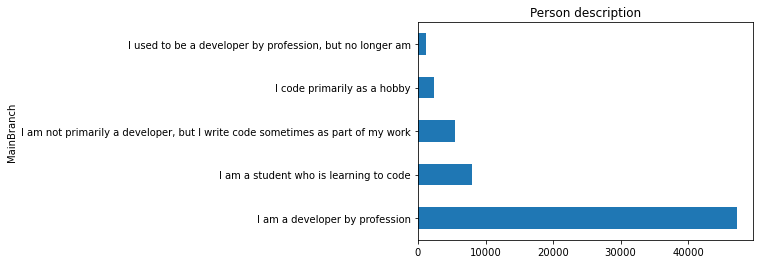

In [9]:
df_2020.groupby(["MainBranch"])["MainBranch"].count().plot.barh(title='Person description')

In [10]:
#The data to use will be related only to `I am a developer by profession`
df_2020 =df_2020[df_2020.MainBranch == "I am a developer by profession"]

In [11]:
#Prepare data to have classify years of experience in range of 5 years
df_2020['YearsCodePro'] = df_2020['YearsCodePro'].replace('Less than 1 year','0')
df_2020['YearsCodePro'] = df_2020['YearsCodePro'].replace('More than 50 years','51')
df_2020['YearsCodePro'] = pd.to_numeric(df_2020['YearsCodePro'])

ranges = {range(-1, 5): "Less than 5 years", 
     range(5, 10): "5 to 9 years", 
     range(10, 15): "10 to 14 years",
     range(15, 20): "15 to 19 years",
     range(20, 25): "20 to 24 years",
     range(25, 30): "25 to 29 years",
     range(30, 35): "30 to 34 years",
     range(35, 40): "35 to 39 years",
     range(40, 45): "40 to 44 years",
     range(45, 50): "45 to 49 years",
     range(50, 55): "50 years or more"
    }
df_2020['YearsClassification'] = df_2020['YearsCodePro'].apply(lambda x: next((v for k, v in ranges.items() if x in k), None))


In [12]:
def ratio_and_plot(s,title, columnName ='type', headNumber=10):
    """
    description: get ratio data data and generates horizontal bar about the generated data .
    :param s: stack data
    :param title: string related to title of the figure to plot
    :param columnName: string related to column name description 
    :param: headNumber: number of rows to return
    return: head of the data frame with number of rows equal to param: headNumber
    """
    #get ratio value [0..1]
    ratio = s.value_counts()/s.shape[0] 
    #convert stack to dataframe
    df = pd.DataFrame(pd.Series(ratio)).reset_index()
    #rename 'ratio' column to the columnName
    df.columns = [columnName,'ratio'] 
    
    #plot the ratio data
    ratio[:headNumber].plot(kind='barh')
    plt.title(title)
    plt.grid(axis='x',linestyle='--')
    plt.xlabel('Ratio')
    plt.gca().invert_yaxis()
    return df.head(headNumber)

def split_stack(df, column, delimiter=';'):
    """
    description: get pandas dataframe to split based on delimiter .
    :param df: pandas dataframe to work on
    :param column: string related to column of the dataframe to work on. 
    :param delimiter: character to use to split the data on the param: column 
    return stack of data splited by the delimiter
    """
    #perform split operation on a specific column on the dataframe and generate a stack
    s = pd.DataFrame(df[column].dropna().str.split(delimiter).tolist()).stack()
    s.reset_index(drop=True)
    return s

In [13]:
def compare_dataset_and_plot(df1, df2, column, title, 
                             sort =True,  headNumber=10, delimiter=';', dataset_names=['LAC', 'Other regions']):
    """
    description: get two dataframes, get ratio values and return a dataframe with ratio of the both input dataframes 
    and horizontal bar to compare.
    :param df1: data frame #1 to work on
    :param df2: data frame #2 to work on
    :param column: name of the column to work on, this needs to be present in both dataframes (df1 and df2)
    :param title: string related to title of the figure to plot
    :param sort: bool value to sort the data by values descending or based on the sort that the df1 already had.
    :param headNumber: number of rows to return
    :param delimiter: character to use to split the data on the param: column 
    :param dataset_names: name of the datasets to compare
    return: head of the data frame  with ratio of the both input dataframe and limited by number of rows 
        equal to param: headNumber
    """
    #get series of data
    s1 = split_stack(df1, column, delimiter)
    s2 = split_stack(df2, column, delimiter)
    
    #get the ratio values
    df1 = pd.DataFrame(pd.Series(s1.value_counts()/s1.shape[0])).reset_index()
    df2 = pd.DataFrame(pd.Series(s2.value_counts()/s2.shape[0])).reset_index()
    df1.columns = [column, dataset_names[0]]
    df2.columns = [column, dataset_names[1]]
    
    #check if the data will be sorted or keep the sort that it already had
    if sort:
        output_df = df1.set_index(column).combine_first(df2.set_index(column)).sort_values(by=[dataset_names[0]], ascending=False)
    else:
        output_df = df1.set_index(column).combine_first(df2.set_index(column))
    
    output_df[:headNumber].plot(kind='barh')
    plt.title(title)
    plt.grid(axis='x',linestyle='--')
    plt.xlabel('Ratio')
    plt.gca().invert_yaxis()
    return output_df[:headNumber]
    

In [14]:
def get_boxplot(df, title, pivot_column, value_column, figsize = [20,5], columns =[], rot =0, order_median =False):
    """
    description: compute a column to perform pivot and generate boxplot figure on each new column from the pivot operation, 
    also return pandas dataframe description to evaluate.
    :param df: data frame to work on
    :param title: string related to title of the figure to plot
    :param pivot_column: name of the column to work on, on this column will be performed the pivot operation
    :param value_column: column to be evaluated and perform the Interquantile Range 
    :param figsize: size of the figure to plot
    :param columns: specify the column names to use
    :param rot: rotation degrees for the label description
    :param order_median: order data based on median
    return: boxplot figure on each new column from the pivot operation, 
    also return pandas dataframe description to evaluate.
    """
    Q1 = df[value_column].quantile(0.25)
    Q3 = df[value_column].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[value_column] >= Q1 - 1.5 * IQR) & (df[value_column] <= Q3 + 1.5 *IQR)
    df = df.loc[filter].pivot(
                                   columns= pivot_column, 
                                   values= value_column)
    # order by median
    if order_median:
        meds = df.median()
        meds.sort_values(ascending=False, inplace=True)
        df = df[meds.index]
    
    # rename columns based on `columns` list
    if len(columns)>0:
        columns = [x for x in columns if x in df.columns]
        boxplot = df.boxplot( column = columns, figsize = figsize)
        boxplot.set_title(title)
        return df[columns].describe()
    else:
        boxplot = df.boxplot(figsize = figsize, 
                             rot = rot)
        boxplot.set_title(title)
        return df.describe()
    
    



## 3 and 4 Prepare data and modeling 
on each question we will still perapre the data to perform the analysis
For the following steps, the dataframes to use are the following:
1. `latin_america_df`: it has data only of Latin america and the Caribbean
2. `other_regions_df`: it has data of the other regios that are not in Latin america and the Caribbean

In [15]:
latin_america_df = df_2020[df_2020.latin_america == 1]
other_regions_df = df_2020[df_2020.latin_america == 0]

### 1. How are developers' demographics in Latin America: average age, country, level of education?

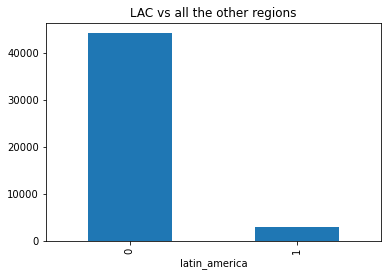

In [16]:
ax = df_2020.groupby('latin_america')['latin_america'].count().plot.bar(title='LAC vs all the other regions')

In [17]:
print (f' there are {latin_america_df.shape[0]} persons in LAC, and the rest of the world has {other_regions_df.shape[0]} persons')


 there are 2988 persons in LAC, and the rest of the world has 44205 persons


---
#### Gender data distribution

,LAC,Other regions
Gender,,
Man,0.935795,0.911613
Woman,0.056232,0.076930
"Non-binary, genderqueer, or gender non-conforming",0.007973,0.011458


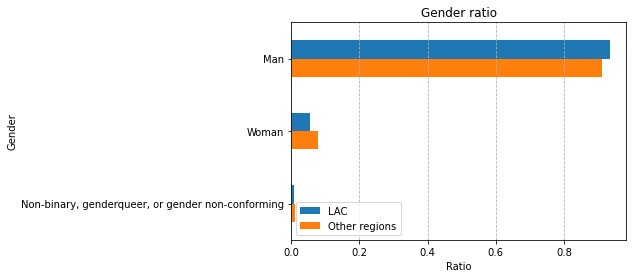

In [18]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'Gender', 'Gender ratio' )

**Notes:** For Latin America and the Caribbean, the software developer profession is dominated by males, having in both cases more than 90%.

---
#### Ethnicity data distribution

,LAC,Other regions
Ethnicity,,
Hispanic or Latino/a/x,0.532117,0.034924
White or of European descent,0.318248,0.675896
Multiracial,0.057664,0.012087
Black or of African descent,0.038321,0.032774
Biracial,0.018613,0.010256
"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",0.015328,0.006566
East Asian,0.010949,0.041025
Middle Eastern,0.004745,0.047824
Southeast Asian,0.002190,0.039166


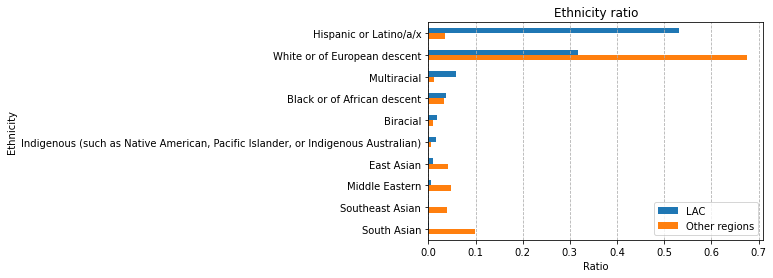

In [19]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'Ethnicity', 'Ethnicity ratio' )

**Notes:** As expected in LAC, it is expected to have `Hispanic or Latino` as the predominant Ethnicity (53.21%). The second larger Ethnicity is  `White or of European descent`, which is dominant in the rest of the world.  `Hispanic or Latino` is part of a minority in the rest of the world

---
#### Country distribution in LAC

,Country distribution in LAC,ratio
0,Brazil,0.474230
1,Mexico,0.135207
2,Argentina,0.098728
3,Colombia,0.075971
4,Chile,0.041499
5,Uruguay,0.027108
6,Peru,0.024766
7,Dominican Republic,0.020750
8,Costa Rica,0.018407
9,Ecuador,0.013722


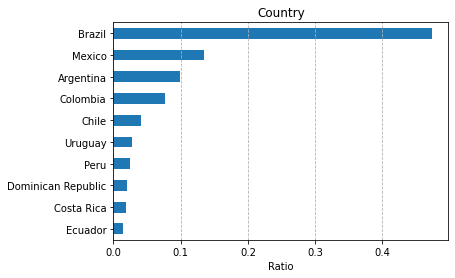

In [20]:
ratio_and_plot(split_stack(latin_america_df,'Country'),'Country','Country distribution in LAC')

**Notes:** As expected in LAC, it is expected to have `Hispanic or Latino` as the predominant Ethnicity (53.21%). The second larger Ethnicity is  `White or of European descent`, which is dominant in the rest of the world.  `Hispanic or Latino` is part of a minority in the rest of the world

---
#### Highest level of formal education

,LAC,Other regions
EdLevel,,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.499626,0.507343
Some college/university study without earning a degree,0.226253,0.106789
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.103590,0.262747
"Professional degree (JD, MD, etc.)",0.055722,0.010671
"Associate degree (A.A., A.S., etc.)",0.050112,0.031042
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.049364,0.044780
"Other doctoral degree (Ph.D., Ed.D., etc.)",0.006731,0.024584
I never completed any formal education,0.005610,0.006782
Primary/elementary school,0.002992,0.005261


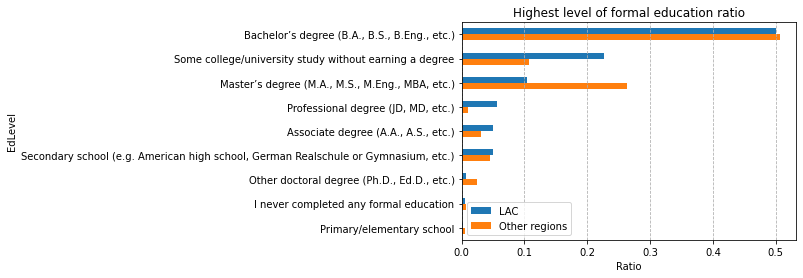

In [21]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'EdLevel', 'Highest level of formal education ratio' )

**Notes:** the average level of formal education has less importance in LAC. Postgraduate degrees are less common in LAC than in other regions.

---
#### Age of other regions (0) vs Latin America (1)

latin_america,0,1
count,30914.000000,2202.000000
mean,30.805405,29.594777
std,7.006561,6.625399
min,12.000000,16.000000
25%,25.000000,25.000000
50%,30.000000,28.000000
75%,35.000000,33.000000
max,51.000000,51.000000


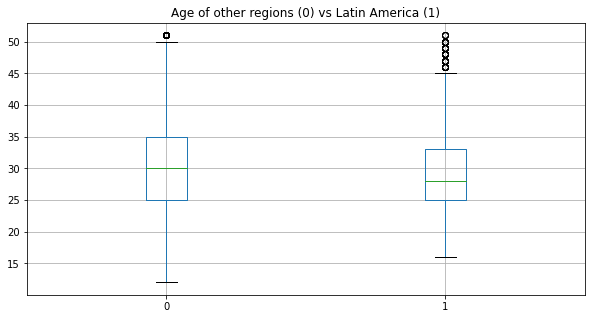

In [22]:
get_boxplot(df_2020, 'Age of other regions (0) vs Latin America (1)', 'latin_america', 'Age',[10,5])

**Notes:** The average age in LAC is 29.5 years old with a median of 28 years; it is very similar to the rest of the world.

---
#### Job searching reasons 

,LAC,Other regions
NEWJobHunt,,
Better compensation,0.183186,0.169849
Better work/life balance,0.149094,0.114567
Wanting to work with new technologies,0.140455,0.143031
Curious about other opportunities,0.135996,0.138273
Growth or leadership opportunities,0.122434,0.127996
Looking to relocate,0.078588,0.062946
Trouble with leadership at my company,0.048305,0.066608
Having a bad day (or week or month) at work,0.041152,0.050191
Trouble with my direct manager,0.029447,0.042500


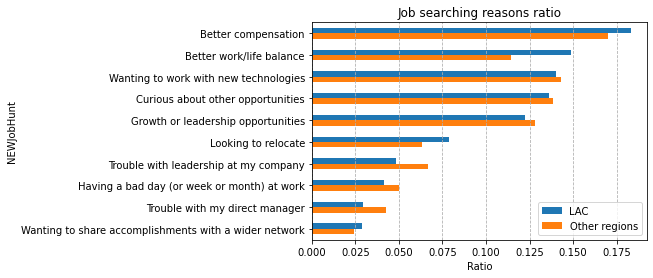

In [23]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'NEWJobHunt', 'Job searching reasons ratio' )

**Notes:** The top 3 job searching reasons in LAC are:
- Better compensation	
- Better work/life balance
- Wanting to work with new technologies	

---
#### How important is a formal education, such as a university degree in computer science

,LAC,Other regions
NEWEdImpt,,
Very important,0.297678,0.239282
Fairly important,0.265322,0.270113
Somewhat important,0.228397,0.241864
Critically important,0.111153,0.087277
Not at all important/not necessary,0.097450,0.161464


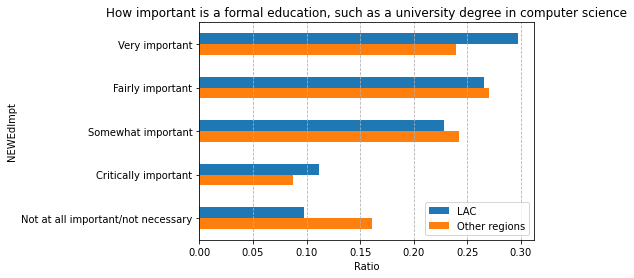

In [24]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'NEWEdImpt', 'How important is a formal education, such as a university degree in computer science' )

**Notes:** In LAC for most of the people (29.76%) said that formal education, such as a  university degree in computer science, is `very important`, however checking in the figure `Highest level of formal education ratio` there are less persons with a postgraduate degree than  the rest of the world.

### 2. Does it change the status of satisfaction related to the professional experience in Latin America?


In [25]:
# list definition to have lables to rename columns
YearsClassification = ['Less than 5 years', '5 to 9 years', '10 to 14 years',
                       '15 to 19 years', '20 to 24 years', '25 to 29 years',
                       '30 to 34 years', '35 to 39 years', '40 to 44 years',
                       '45 to 49 years', '50 years or more']
order_satisfaccion = ['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied']

---
#### Job satisfaction

,LAC,Other regions
JobSat,,
Neither satisfied nor dissatisfied,0.139905,0.126203
Slightly dissatisfied,0.176073,0.155328
Slightly satisfied,0.288553,0.309689
Very dissatisfied,0.125596,0.079220
Very satisfied,0.269873,0.329560


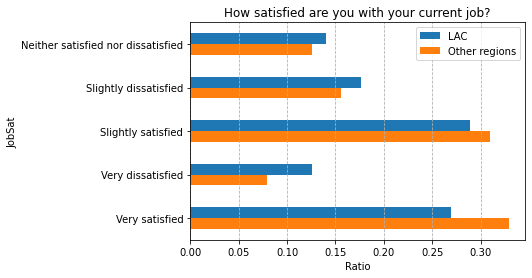

In [26]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'JobSat', 'How satisfied are you with your current job?' ,False)

**Notes:** In general, most people are satisfied with their current job.

---
#### Professional experience

,LAC,Other regions
YearsClassification,,
Less than 5 years,0.408220,0.392096
5 to 9 years,0.283719,0.275203
10 to 14 years,0.156425,0.147633
15 to 19 years,0.073424,0.074792
20 to 24 years,0.042698,0.059422
30 to 34 years,0.014366,0.014315
25 to 29 years,0.012769,0.023068
35 to 39 years,0.005986,0.007962
40 to 44 years,0.000798,0.003770


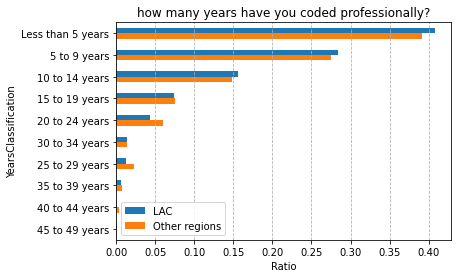

In [27]:
compare_dataset_and_plot(latin_america_df.dropna(subset=['JobSat','YearsClassification'], axis=0)
                         ,other_regions_df.dropna(subset=['JobSat','YearsClassification'], axis=0)
                         ,'YearsClassification', 'how many years have you coded professionally?' ,True)

**Notes:** Most of the persons have less than five years of professional experience; it relates to the age of persons. In LAC, there are very few persons with more than 30 years of experience.

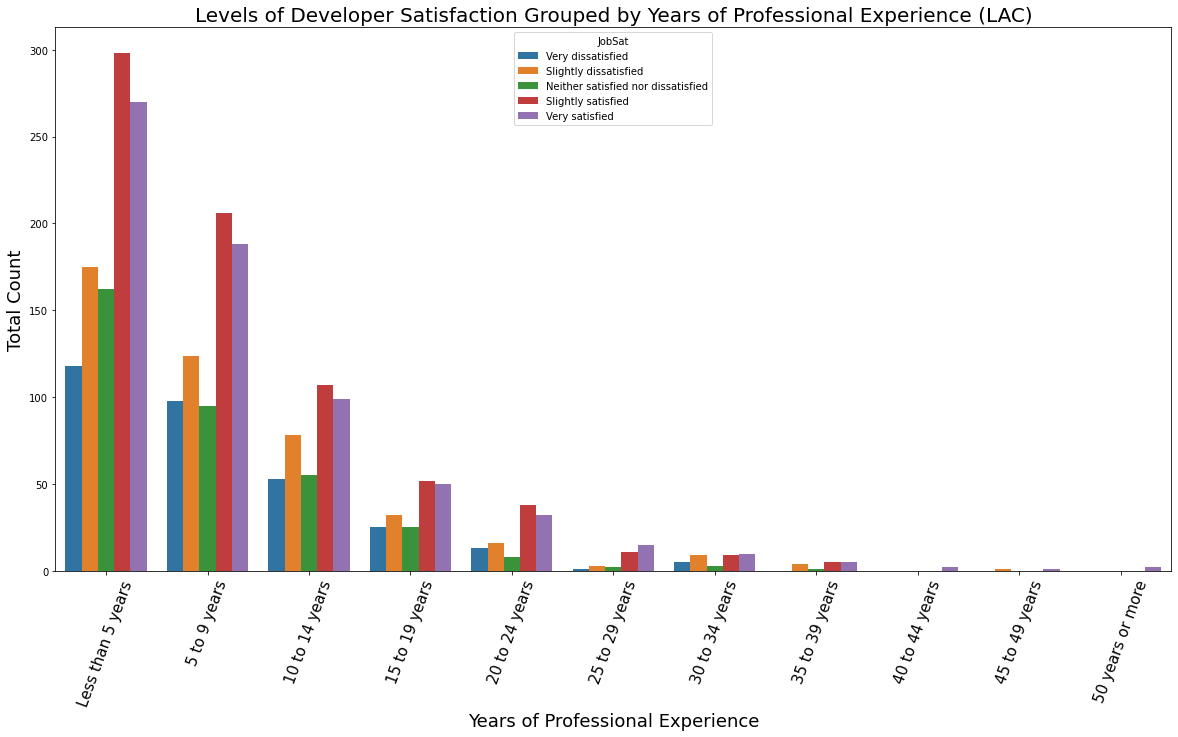

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x='YearsClassification', hue='JobSat', data=latin_america_df,
              order = YearsClassification,
             hue_order = order_satisfaccion)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70)
ax.set_title('Levels of Developer Satisfaction Grouped by Years of Professional Experience (LAC)', fontsize=20)
ax.set_xlabel('Years of Professional Experience', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18);

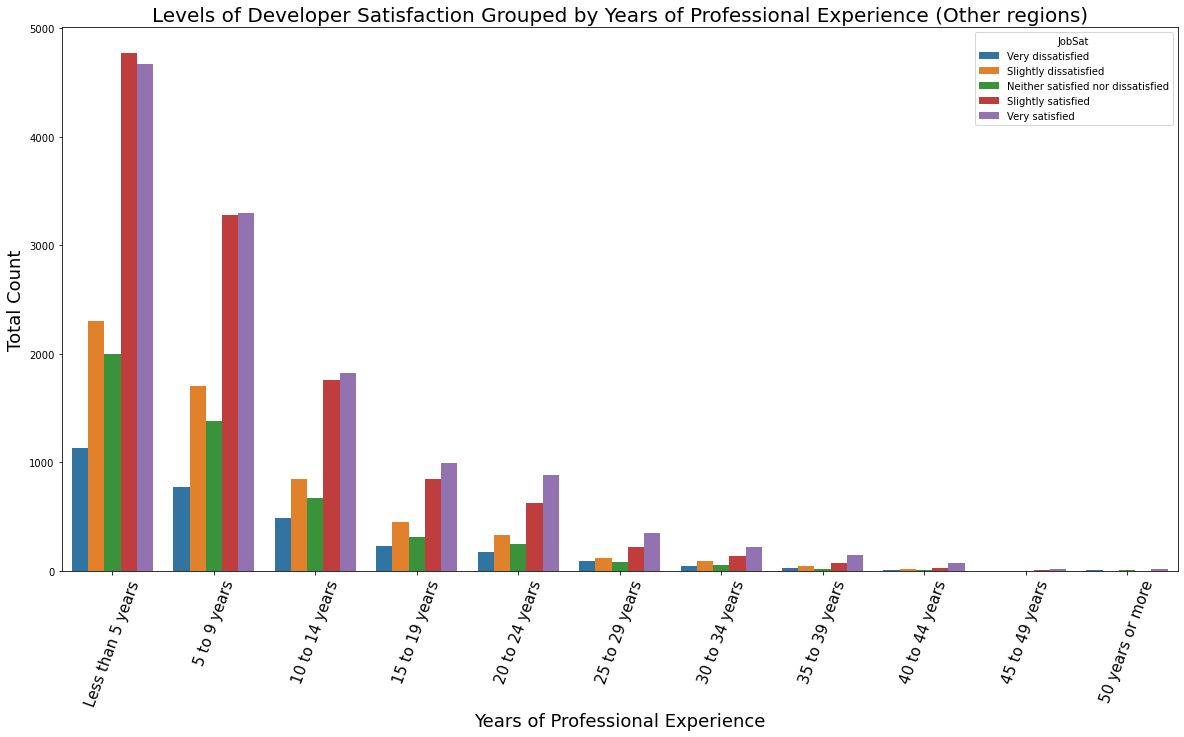

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x='YearsClassification', hue='JobSat', data=other_regions_df,
              order= YearsClassification,
             hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70)
ax.set_title('Levels of Developer Satisfaction Grouped by Years of Professional Experience (Other regions)', fontsize=20)
ax.set_xlabel('Years of Professional Experience', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18);

**Notes:** A difference with other regions, in LAC with the increase of experience, most persons keep as `Slightly satisfied` as the level of satisfaction in their current job.

### 3. What is the salary behavior according to years of experience, country and Developer type?

---
#### General salary information  (other regions  vs LAC )

latin_america,0,1
count,27404.000000,2126.000000
mean,61398.257298,23894.427563
std,44856.853307,21507.588373
min,0.000000,0.000000
25%,25944.000000,10656.000000
50%,53143.500000,18060.000000
75%,86478.000000,29196.000000
max,200429.000000,200000.000000


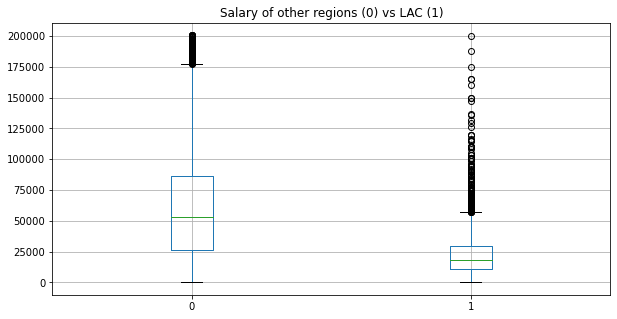

In [30]:
get_boxplot(df_2020, 'Salary of other regions (0) vs LAC (1)', 'latin_america', 'ConvertedComp',[10,5])

**Notes:** There is a massive difference in salary for LAC vs. the other regions. The annual mean ($ 23894.42)  and median ($ 18060.00) is lower than the quartile 1  (Q1 - 25%) of other regions.

---
#### Salary by years of experience

YearsClassification,Less than 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,45 to 49 years,50 years or more
count,858.000000,580.000000,286.000000,131.000000,74.000000,17.000000,24.000000,13.000000,1.0,1.0
mean,13438.948718,21383.891379,26067.986014,27934.366412,28220.270270,31329.764706,34087.791667,32545.153846,19392.0,34360.0
std,9083.414871,11721.490970,11869.354385,12116.669679,11881.181299,12886.776515,10997.859855,13577.190393,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,1135.000000,17520.000000,12048.000000,13740.000000,19392.0,34360.0
25%,7152.000000,12591.000000,17541.000000,19788.000000,21996.000000,21408.000000,29207.250000,19464.000000,19392.0,34360.0
50%,11268.000000,19236.000000,24744.000000,27492.000000,27492.000000,25860.000000,32988.000000,29196.000000,19392.0,34360.0
75%,17028.000000,27492.000000,32988.000000,36450.000000,36762.000000,36300.000000,40791.000000,43980.000000,19392.0,34360.0
max,57267.000000,56436.000000,57250.000000,56760.000000,57267.000000,54972.000000,56766.000000,53865.000000,19392.0,34360.0


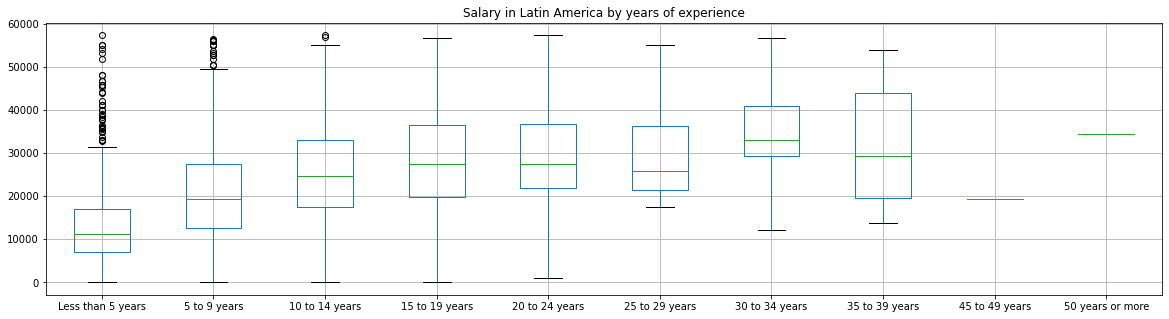

In [31]:
get_boxplot(latin_america_df, 'Salary in Latin America by years of experience', 'YearsClassification', 'ConvertedComp',[20,5],YearsClassification)

YearsClassification,Less than 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 years or more
count,10603.000000,7804.000000,4117.000000,2025.000000,1575.000000,594.000000,353.000000,185.000000,86.000000,16.000000,14.0000
mean,41251.392625,62287.138903,76829.797911,86050.501235,95595.453333,97872.754209,101325.498584,104855.464865,107543.360465,87064.187500,107861.0000
std,36089.574660,41810.396837,44283.965656,44743.071912,45697.031407,47853.833888,49511.423525,45017.785812,48588.963361,67274.105893,58348.8364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,11688.000000,30967.000000,44320.000000,51888.000000,61851.000000,62349.000000,64859.000000,70264.000000,71250.000000,30451.000000,82069.7500
50%,33294.000000,54049.000000,68184.000000,77832.000000,90482.000000,90482.000000,98000.000000,108100.000000,100000.000000,93973.000000,118266.0000
75%,59607.000000,85000.000000,103776.000000,118908.000000,128480.000000,133450.000000,137649.000000,133619.000000,147500.000000,132500.000000,142500.0000
max,207552.000000,207552.000000,207552.000000,207000.000000,205000.000000,205001.000000,207552.000000,200000.000000,200000.000000,203298.000000,200000.0000


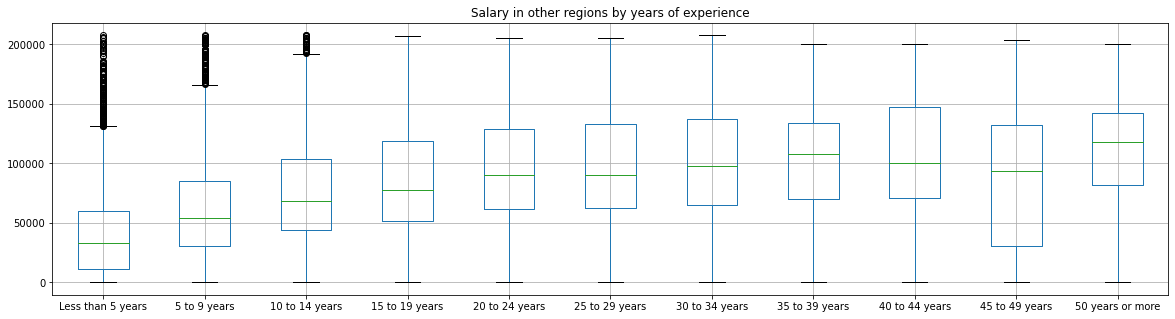

In [32]:
get_boxplot(other_regions_df, 'Salary in other regions by years of experience', 'YearsClassification', 'ConvertedComp',[20,5],YearsClassification)


**Notes:** A good news is that with more experience, it will be expected to earn more, we have more significant improvements for the 5 to 9 years of experience.

---
#### Salary by countries in LAC

Country,Uruguay,Costa Rica,Panama,Chile,Guatemala,Mexico,Honduras,Colombia,Argentina,Ecuador,Brazil,Dominican Republic,El Salvador,Paraguay,Peru,Nicaragua,Bolivia,Cuba
count,47.000000,23.000000,10.000000,80.000000,18.000000,260.000000,10.00000,147.000000,200.000000,24.000000,994.000000,37.000000,13.000000,9.000000,47.000000,17.000000,20.000000,15.000000
mean,31844.425532,28491.652174,21720.000000,22591.012500,22338.888889,19785.484615,21231.20000,19863.795918,19299.470000,20146.666667,19008.236419,18247.054054,17465.846154,12582.666667,17189.148936,13976.470588,14998.800000,11101.066667
std,15308.107185,14163.272139,5850.887872,11708.367189,11418.525551,11658.064311,10326.91324,12397.490033,11999.162438,11040.410053,12144.815910,10059.037501,6353.736248,4527.102826,12343.462824,11511.759369,12261.153795,11994.163577
min,4728.000000,7080.000000,11400.000000,12.000000,2208.000000,0.000000,9648.00000,4.000000,12.000000,4200.000000,0.000000,6288.000000,9000.000000,5520.000000,2950.000000,3504.000000,4344.000000,372.000000
25%,19530.000000,16578.000000,18500.000000,13359.000000,15138.000000,10344.000000,13272.00000,10596.000000,10116.000000,12000.000000,9624.000000,11232.000000,13200.000000,9192.000000,8868.000000,4248.000000,6948.000000,5826.000000
50%,32800.000000,24324.000000,22200.000000,22092.000000,22020.000000,19295.500000,18102.00000,17652.000000,17160.000000,16802.000000,16488.000000,15720.000000,15000.000000,13944.000000,13717.000000,10800.000000,8886.000000,7788.000000
75%,45078.000000,41400.000000,24750.000000,30108.000000,28313.500000,25860.000000,28577.00000,27546.000000,25296.000000,25500.000000,26112.000000,22452.000000,22200.000000,16548.000000,23058.000000,20400.000000,16404.000000,10200.000000
max,57000.000000,49348.000000,31200.000000,52680.000000,50000.000000,53865.000000,42000.00000,53172.000000,56766.000000,48000.000000,57267.000000,56134.000000,30000.000000,18384.000000,56760.000000,42000.000000,43392.000000,42000.000000


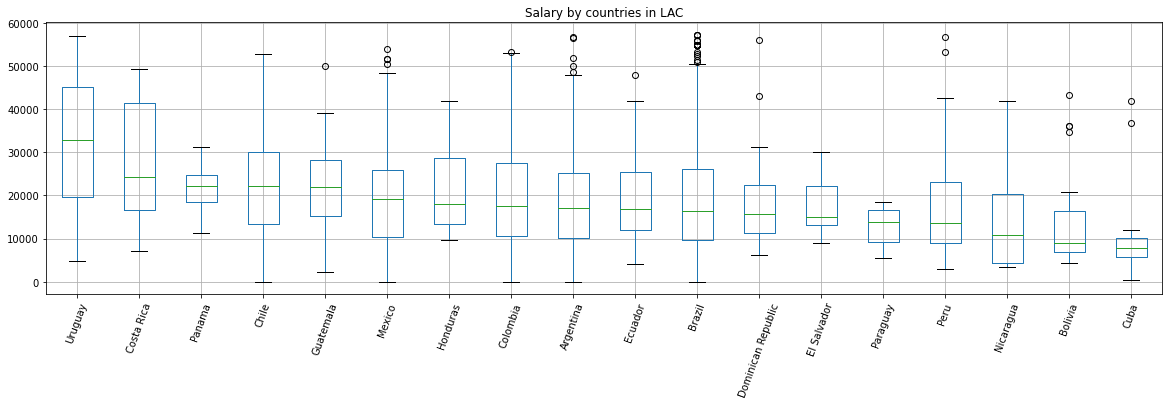

In [33]:
get_boxplot(latin_america_df.groupby("Country").filter(lambda x: len(x) > 10), 
            'Salary by countries in LAC', 
            'Country', 
            'ConvertedComp', 
            rot = 70, 
            order_median=True)


**Notes:**  In LAC, the top 3 countries with the higher salary expected are:
- Uruguay
- Costa Rica
- Panama

I'm from Guatemala, and it is in the fifth position. Cuva is the country with the lowest expected salary.

---
#### Salary by developer type LAC

In [34]:
dev_salary = latin_america_df[latin_america_df['ConvertedComp']>10] #. loc[:,['DevType','ConvertedComp']].dropna()
dev_salary.shape

(2138, 63)

In [35]:
def split_column_keep_values(df, column1, column2):
    """
    description: use two columns to create a new data fram related to a column splited and pivoted vs dimension column
    :param df: pandas data frame to work on.
    :param column1: column to be splited and performed pivot
    :param column2: column to use as value
    return new dataframe with the pivot and values
    """
    df = df.loc[:,[column1,column2]].dropna()
    new_df = pd.DataFrame(columns = [column1,column2])
    for index, row in df.iterrows():
        columns = row[column1].split(';')
        for col in columns:
            new_df.loc[len(new_df)] = [col, row[column2]]
    return new_df


DevType,Senior executive/VP,Engineering manager,"Engineer, site reliability",Product manager,DevOps specialist,"Engineer, data",Data or business analyst,Educator,System administrator,"Developer, desktop or enterprise applications",...,"Developer, QA or test",Scientist,"Developer, mobile",Database administrator,"Developer, front-end","Developer, embedded applications or devices",Academic researcher,"Developer, game or graphics",Marketing or sales professional,Designer
count,24.000000,89.000000,65.000000,95.000000,208.000000,130.000000,150.000000,120.000000,213.000000,508.000000,...,165.000000,68.000000,536.000000,242.000000,927.000000,208.000000,194.000000,105.000000,15.000000,181.00000
mean,32863.375000,27906.426966,24018.276923,23411.294737,23793.341346,22171.376923,21210.846667,21590.633333,19800.657277,19934.938976,...,20356.248485,19109.161765,19413.522388,18310.793388,18792.661273,19068.812500,17927.412371,17549.019048,17150.266667,16844.19337
std,13046.987531,13829.280940,11893.829455,12063.080668,12324.009921,12941.932040,12221.376328,12257.651511,12567.673532,12598.318864,...,12486.929267,11406.886144,12404.448290,12103.954675,12533.947065,12307.243246,11813.294644,11977.733208,14151.174143,12085.83931
min,8244.000000,1380.000000,1380.000000,3876.000000,1135.000000,1380.000000,3300.000000,2208.000000,1135.000000,50.000000,...,12.000000,2916.000000,180.000000,12.000000,12.000000,50.000000,12.000000,1380.000000,1700.000000,372.00000
25%,22437.000000,18060.000000,13740.000000,13934.000000,13740.000000,12090.000000,12087.000000,11640.000000,10344.000000,9624.000000,...,10896.000000,10797.000000,9696.000000,9474.000000,9444.000000,9624.000000,8814.000000,8244.000000,10344.000000,8160.00000
50%,32316.000000,26664.000000,23364.000000,21996.000000,21996.000000,19314.000000,19236.000000,18630.000000,17652.000000,17279.000000,...,16762.000000,16560.000000,16488.000000,16164.000000,15888.000000,15348.000000,15120.000000,13740.000000,13740.000000,12744.00000
75%,42774.000000,38844.000000,32988.000000,29807.000000,31779.000000,30240.000000,27492.000000,29628.500000,25860.000000,27492.000000,...,29196.000000,24765.000000,25860.000000,24550.000000,25568.000000,25296.000000,24744.000000,23364.000000,18719.000000,22620.00000
max,56760.000000,56760.000000,48000.000000,56000.000000,58620.000000,57624.000000,58620.000000,51900.000000,57624.000000,58620.000000,...,56000.000000,48104.000000,58000.000000,57624.000000,58392.000000,56000.000000,58620.000000,58000.000000,49600.000000,53865.00000


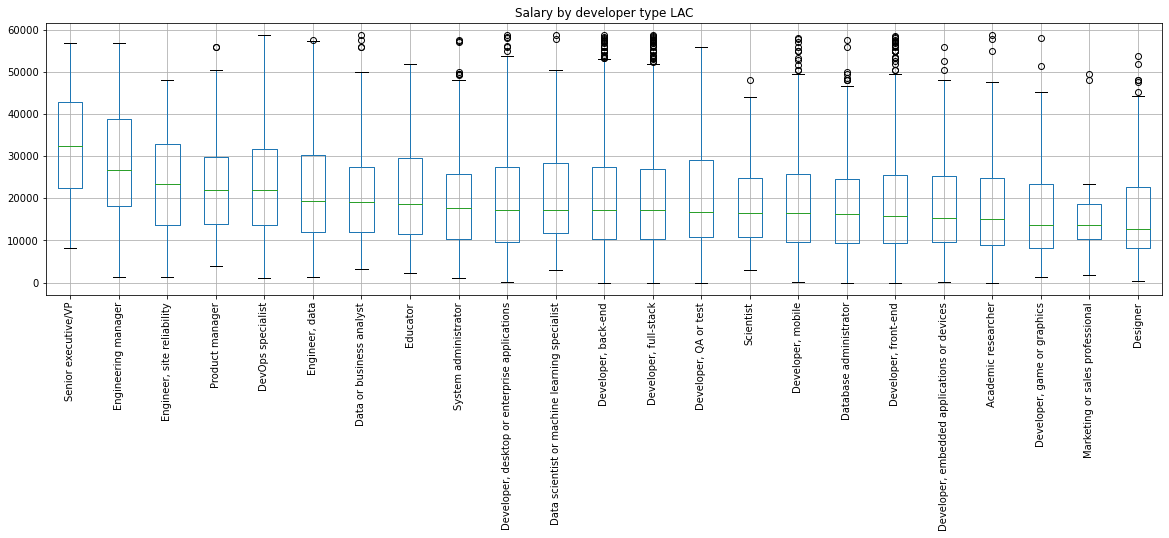

In [36]:
dev_salary = latin_america_df[latin_america_df['ConvertedComp']>10]
dev_salary = split_column_keep_values(dev_salary, 'DevType', 'ConvertedComp')
get_boxplot(dev_salary, 
            'Salary by developer type LAC', 
            'DevType', 
            'ConvertedComp', 
            rot = 90, 
            order_median=True)


DevType,Engineering manager,"Engineer, site reliability",Senior executive/VP,DevOps specialist,"Engineer, data",Scientist,Product manager,"Developer, embedded applications or devices","Developer, desktop or enterprise applications",Data or business analyst,...,System administrator,"Developer, back-end",Marketing or sales professional,Database administrator,Educator,"Developer, game or graphics","Developer, front-end",Designer,"Developer, mobile",Academic researcher
count,1364.000000,977.000000,497.00000,3619.000000,1877.000000,808.000000,1138.000000,2551.000000,6891.000000,1556.000000,...,2463.000000,16113.000000,179.000000,3017.000000,1322.000000,1408.000000,10539.000000,2466.000000,5180.000000,1298.000000
mean,93178.892229,83405.818833,85496.84507,74185.620337,71580.670218,66597.435644,65984.949912,65419.179145,63886.651284,62698.976221,...,64052.880633,62480.078322,65439.586592,59531.569771,58565.618003,59908.004972,58439.355726,55494.494323,54900.355985,51073.349769
std,50917.604846,49937.288410,52955.27284,45506.210673,48162.640519,45841.721614,47073.255758,46105.683290,45195.522200,45348.294520,...,45007.887301,45709.543624,51319.713340,44350.694326,45134.740088,42896.002271,44214.119523,44613.587000,46110.090956,42343.391101
min,52.000000,150.000000,432.00000,12.000000,12.000000,54.000000,24.000000,12.000000,12.000000,12.000000,...,24.000000,12.000000,100.000000,24.000000,24.000000,24.000000,12.000000,24.000000,12.000000,18.000000
25%,53988.000000,44400.000000,44100.00000,40788.500000,32429.000000,31797.750000,28536.000000,30192.000000,28536.000000,25015.000000,...,29832.000000,26527.000000,23451.000000,24480.000000,23097.000000,29079.000000,23322.000000,18402.000000,16753.500000,16104.750000
50%,89245.000000,77556.000000,76000.00000,66810.000000,64859.000000,58368.000000,56831.000000,56211.000000,56000.000000,55950.000000,...,54532.000000,53957.000000,51888.000000,51704.000000,50806.000000,50000.000000,49368.000000,46533.000000,44508.000000,42000.000000
75%,130000.000000,120000.000000,120257.00000,101140.000000,103000.000000,90851.500000,91970.750000,91883.000000,90000.000000,90000.000000,...,88320.000000,87559.000000,90401.000000,85000.000000,82118.250000,81000.000000,83500.000000,78978.000000,80000.000000,71293.500000
max,208000.000000,207000.000000,208000.00000,208000.000000,205000.000000,207552.000000,208000.000000,208000.000000,208000.000000,206815.000000,...,208000.000000,208000.000000,208000.000000,206815.000000,207552.000000,208000.000000,208000.000000,208000.000000,208000.000000,207552.000000


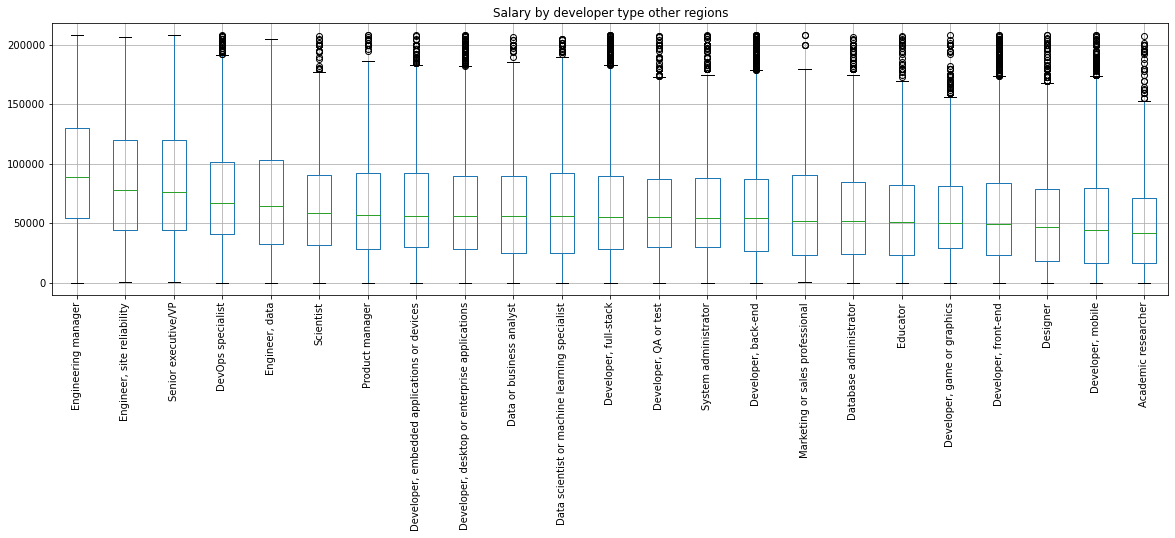

In [37]:
dev_salary = other_regions_df[other_regions_df['ConvertedComp']>10]
dev_salary = split_column_keep_values(dev_salary, 'DevType', 'ConvertedComp')
get_boxplot(dev_salary, 
            'Salary by developer type other regions', 
            'DevType', 
            'ConvertedComp', 
            rot = 90, 
            order_median=True)

**Notes:**  The manager positions are expected to have more incomes; they are also related to years of experience. Typically will be expected to switch from a technical role to a manager position. 

### 4. What skills are more valuable for the developers (technology you want to work in over the next year), and what skills generate more earning?


---
#### Salary by languages

LanguageWorkedWith,Scala,Perl,Go,Bash/Shell/PowerShell,Ruby,Kotlin,Swift,Objective-C,Java,C,...,JavaScript,Dart,HTML/CSS,Rust,C#,C++,Assembly,PHP,Haskell,Julia
count,65.000000,25.000000,162.000000,495.000000,189.000000,159.000000,104.000000,68.000000,822.000000,291.000000,...,1508.000000,110.000000,1343.000000,39.000000,648.000000,301.000000,76.000000,638.000000,36.000000,14.000000
mean,26561.830769,23703.040000,22855.438272,22612.476768,22852.269841,22073.880503,21848.096154,22548.352941,19977.819951,20001.106529,...,19729.159151,19325.381818,19449.034252,19737.307692,19036.108025,18948.996678,19707.894737,17592.863636,19882.888889,16283.142857
std,12469.152373,10093.780926,12469.091325,12826.082654,13358.812703,12454.343729,13280.009844,13227.025018,12051.771340,12450.067245,...,12280.102663,12292.839531,12227.533821,13554.110255,11798.476584,12816.157988,12396.158631,11770.919145,13758.569406,14845.618441
min,4788.000000,4344.000000,240.000000,50.000000,50.000000,372.000000,180.000000,180.000000,12.000000,1920.000000,...,12.000000,180.000000,12.000000,2047.000000,180.000000,50.000000,1920.000000,12.000000,240.000000,3216.000000
25%,15576.000000,16164.000000,13535.500000,12372.000000,12924.000000,12606.000000,12072.000000,14739.750000,10464.000000,9624.000000,...,10344.000000,10173.000000,9900.000000,9048.000000,10116.000000,9000.000000,10992.000000,8400.000000,8391.000000,7860.000000
50%,25860.000000,24960.000000,21312.000000,20892.000000,20616.000000,20064.000000,19619.500000,19431.500000,17868.000000,17868.000000,...,16866.000000,16560.000000,16493.000000,16488.000000,16331.000000,16164.000000,15888.000000,15120.000000,14898.000000,10572.000000
75%,33600.000000,29688.000000,30240.000000,30240.000000,30000.000000,30202.000000,26754.000000,27834.000000,27488.000000,27212.000000,...,26523.000000,26328.000000,26112.000000,28828.000000,25614.000000,25296.000000,25923.000000,23364.000000,29438.000000,14559.000000
max,50436.000000,43980.000000,56134.000000,58620.000000,57267.000000,54972.000000,54972.000000,53244.000000,56000.000000,54972.000000,...,58620.000000,57720.000000,58620.000000,53208.000000,57624.000000,57267.000000,53208.000000,58176.000000,53208.000000,49476.000000


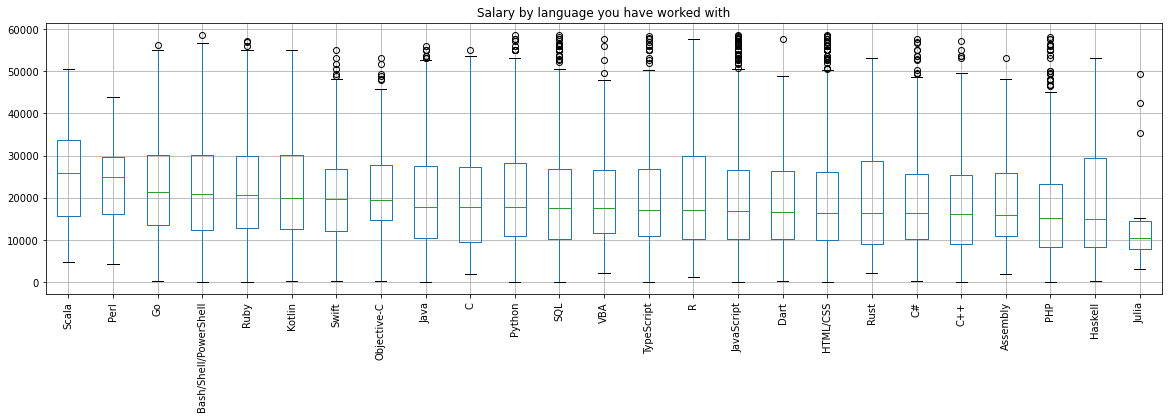

In [38]:
dev_salary = latin_america_df[latin_america_df['ConvertedComp']>10]
dev_salary = split_column_keep_values(dev_salary, 'LanguageWorkedWith', 'ConvertedComp')
get_boxplot(dev_salary, 
            'Salary by language you have worked with', 
            'LanguageWorkedWith', 
            'ConvertedComp', 
            rot = 90, 
            order_median=True)

,LAC,Other regions
LanguageDesireNextYear,,
JavaScript,0.124428,0.113072
Python,0.104739,0.105044
HTML/CSS,0.093709,0.088634
SQL,0.086683,0.085845
TypeScript,0.082516,0.083807
Go,0.061438,0.057238
C#,0.050899,0.060711
Java,0.050327,0.053355
Kotlin,0.046814,0.041953


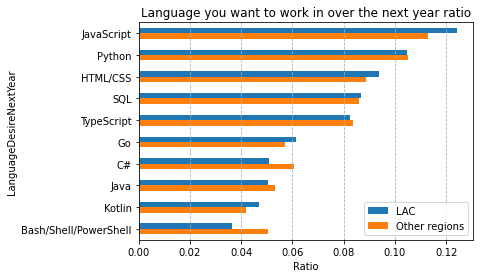

In [39]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'LanguageDesireNextYear', 'Language you want to work in over the next year ratio' )

**Note:** ironically, the languages that generate more earnings are not the most wanted to learn or want to work.  It could be that they refer to specific roles. 

---
#### Salary by databases

DatabaseWorkedWith,Cassandra,Elasticsearch,Redis,DynamoDB,IBM DB2,Oracle,Couchbase,PostgreSQL,Microsoft SQL Server,SQLite,MongoDB,Firebase,MySQL,MariaDB
count,48.000000,250.000000,402.000000,172.000000,67.000000,396.000000,24.000000,825.000000,710.000000,507.000000,599.000000,348.000000,1088.000000,399.000000
mean,26526.520833,25959.696000,25219.761194,24511.180233,24155.880597,22017.156566,23566.666667,21531.865455,20696.088732,20717.735700,20861.894825,20322.537356,19742.778493,19272.210526
std,12507.162914,13460.045329,14443.475817,13422.197872,13249.382422,11992.585340,13501.297685,13490.843063,12343.759569,12962.007755,13047.762108,12977.599756,12976.836244,12719.541881
min,4656.000000,180.000000,180.000000,180.000000,144.000000,180.000000,6876.000000,180.000000,12.000000,50.000000,180.000000,180.000000,12.000000,660.000000
25%,16407.000000,16488.000000,13504.500000,14373.000000,13950.000000,13710.000000,12372.000000,11064.000000,11001.000000,10992.000000,10992.000000,10644.000000,9732.000000,9432.000000
50%,27492.000000,24872.000000,23364.000000,22266.000000,21336.000000,20845.000000,19752.000000,19236.000000,18240.000000,17868.000000,17409.000000,17040.000000,16488.000000,16488.000000
75%,32403.000000,34347.000000,32988.000000,30240.000000,32653.500000,27492.000000,32316.000000,28634.000000,27491.000000,27492.000000,27492.000000,25968.000000,26496.000000,25860.000000
max,60480.000000,60480.000000,61404.000000,61404.000000,60480.000000,60480.000000,49600.000000,61404.000000,61404.000000,61404.000000,61404.000000,60480.000000,61404.000000,60932.000000


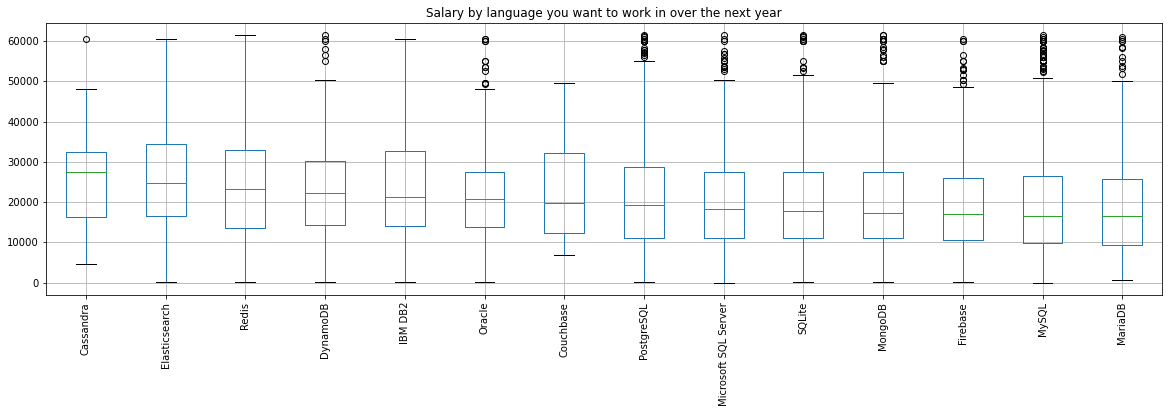

In [40]:
dev_salary = latin_america_df[latin_america_df['ConvertedComp']>10]
dev_salary = split_column_keep_values(dev_salary, 'DatabaseWorkedWith', 'ConvertedComp')
get_boxplot(dev_salary, 
            'Salary by language you want to work in over the next year', 
            'DatabaseWorkedWith', 
            'ConvertedComp', 
            rot = 90, 
            order_median=True)

,LAC,Other regions
DatabaseDesireNextYear,,
MongoDB,0.140803,0.127290
PostgreSQL,0.137796,0.150185
MySQL,0.106681,0.113976
Redis,0.106550,0.109660
Firebase,0.088378,0.065127
Elasticsearch,0.086809,0.093839
SQLite,0.069552,0.083558
Microsoft SQL Server,0.067591,0.081418
MariaDB,0.054125,0.046456


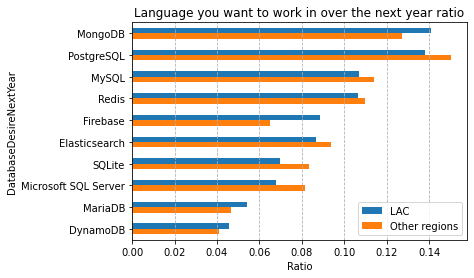

In [41]:
compare_dataset_and_plot(latin_america_df, other_regions_df,'DatabaseDesireNextYear', 'Language you want to work in over the next year ratio' )

**Note:** ironically, the databases that generate more earnings are not the most wanted to learn or want to work.  It could be that they refer to specific roles. 